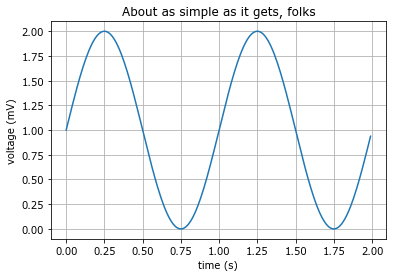

In [102]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

In [103]:
#图片
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

path='/Users/yexianyong/Desktop/jupyter_notebook/工具学习/matplotlib_pic.png'
img=mpimg.imread(path)
#数据说明：
#[ 0.40784314,  0.40784314,  0.40784314]这是一个像素点的rgb
"""
这是一排像素点
[[ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],
"""
"""
这就是多排组成的图片了
[[[ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],

       [[ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        ..., 
"""
img.shape

(175, 176, 4)

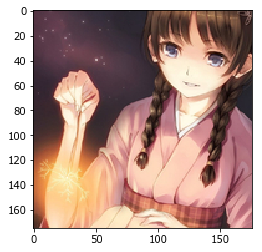

In [104]:
fig, ax = plt.subplots()
#显示全部部分
imgplot=plt.imshow(img)
plt.show()

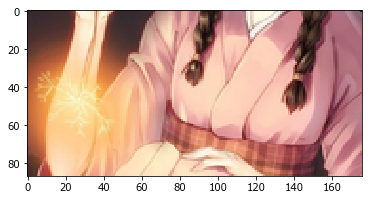

In [105]:
fig, ax = plt.subplots()
#显示下半部分
imgplot=plt.imshow(img[-int(len(img)*0.5):])
plt.show()

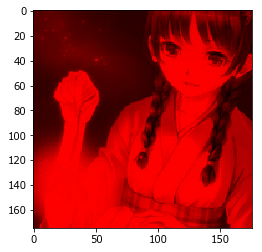

In [106]:
#获取图片红色通道色阶
fig, ax = plt.subplots()
#红色通道图片
red_img=np.zeros(img.shape)
red_img[:,:,0:1]=img[:,:,0:1]
red_img[:,:,-1]=img[:,:,-1]
imgplot=plt.imshow(red_img)
plt.show()

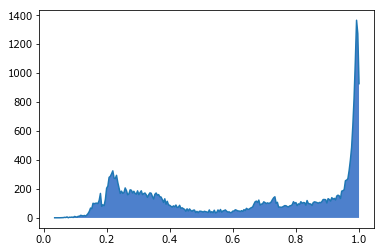

In [107]:
#红色通道色阶可视化
import pandas as pd
level=img[:,:,0:1].reshape([len(img)*len(img[0])])
data=pd.DataFrame(level)
grouped=data.groupby(0).size()

fig,ax=plt.subplots()
ax.plot(grouped.index,grouped.values)
ax.fill_between(grouped.index,grouped.values,where=grouped.values<=max(grouped.values),facecolor=(0.3,0.5,0.8))
plt.show()

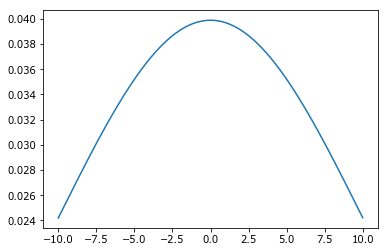

In [108]:
#高斯模糊
#http://accu.cc/content/pil/spatial_filter_gaussian_blur/
import math
#模糊半径
r=20


def gaussian_dis(r,sigma):
    sigma=sigma
    return 1 / math.sqrt((2 * math.pi * sigma ** 2))* math.exp((-r**2) / (2 * sigma ** 2))


t = np.arange(-10.0, 10.0, 0.01)
s = np.array([gaussian_dis(x,r*0.5) for x in t])
fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

In [109]:
#权重矩阵11X11(5*2+1)
#取 σ = 1.5, 并假定中心坐标为 (0, 0), 代入公式, 
#则容易得到包含中心坐标在内的 25(即: 模糊半径 r=2) 个坐标的权重为

# weights=np.arange(pow(r*2+1,2),dtype='float').reshape([r*2+1,r*2+1])
# for y in weights:
#     for x in y:
#         index=np.argwhere(weights==x)
#         weights[index[0][0],index[0][1]]=math.sqrt(pow(index[0][0]-r,2)+pow(index[0][1]-r,2))
# weights

scope=np.arange(-r,r+1)
x,y=np.meshgrid(scope,scope)
arr=np.rec.fromarrays([x,y])
import math
weights=np.apply_along_axis(lambda coord : math.sqrt(pow(coord[0],2)+pow(coord[1],2)),2,arr.tolist())
weights

array([[28.28427125, 27.58622845, 26.90724809, ..., 26.90724809,
        27.58622845, 28.28427125],
       [27.58622845, 26.87005769, 26.17250466, ..., 26.17250466,
        26.87005769, 27.58622845],
       [26.90724809, 26.17250466, 25.45584412, ..., 25.45584412,
        26.17250466, 26.90724809],
       ...,
       [26.90724809, 26.17250466, 25.45584412, ..., 25.45584412,
        26.17250466, 26.90724809],
       [27.58622845, 26.87005769, 26.17250466, ..., 26.17250466,
        26.87005769, 27.58622845],
       [28.28427125, 27.58622845, 26.90724809, ..., 26.90724809,
        27.58622845, 28.28427125]])

In [110]:
#高斯分布计算
weights=np.array([[gaussian_dis(x,r*0.5) for x in y] for y in weights])
#归一化，所有数据和为1
def softmax(vec):
    return vec/np.sum(vec)
weights=softmax(weights)
np.sum(weights),weights[0]

(1.0, array([3.16485717e-05, 3.84628569e-05, 4.62792187e-05, 5.51299442e-05,
        6.50198768e-05, 7.59209768e-05, 8.77676534e-05, 1.00453308e-04,
        1.13828510e-04, 1.27701182e-04, 1.41839058e-04, 1.55974576e-04,
        1.69812183e-04, 1.83037861e-04, 1.95330505e-04, 2.06374612e-04,
        2.15873593e-04, 2.23562948e-04, 2.29222471e-04, 2.32686725e-04,
        2.33853072e-04, 2.32686725e-04, 2.29222471e-04, 2.23562948e-04,
        2.15873593e-04, 2.06374612e-04, 1.95330505e-04, 1.83037861e-04,
        1.69812183e-04, 1.55974576e-04, 1.41839058e-04, 1.27701182e-04,
        1.13828510e-04, 1.00453308e-04, 8.77676534e-05, 7.59209768e-05,
        6.50198768e-05, 5.51299442e-05, 4.62792187e-05, 3.84628569e-05,
        3.16485717e-05]))

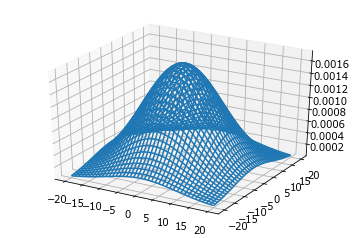

In [111]:
#可视化正态分布数据
#https://matplotlib.org/examples/mplot3d/subplot3d_demo.html

fig=plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

X=np.arange(-r,r+1,1)
Y=X
X, Y = np.meshgrid(X, Y)

ax.plot_wireframe(X,Y,weights)
plt.show()

(175, 176, 3) (41, 41, 3)


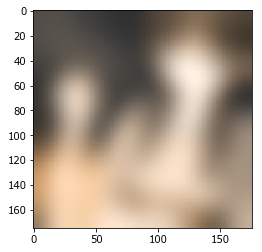

In [112]:
#开始高斯模糊
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.convolve.html
import scipy
from scipy import signal

#卷积层:卷积层深度与图像通道数保持一致
filters=np.zeros([len(weights),len(weights[0]),3])
filters[:,:,0]=weights
filters[:,:,1]=weights
filters[:,:,2]=weights
# print(filters)

print(img[:,:,0:3].shape,filters.shape)

#卷积操作
convolution=scipy.ndimage.filters.convolve(img[:,:,0:3],filters)
convolution=convolution/np.max(convolution)

#输出模糊后图片
fig, ax = plt.subplots()
imgplot=plt.imshow(convolution)
plt.show()

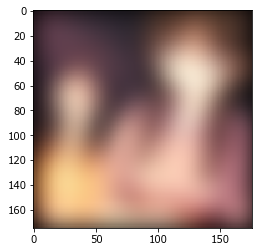

In [113]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
red=scipy.signal.convolve2d(img[:,:,0],weights,mode='same')
green=scipy.signal.convolve2d(img[:,:,1],weights,mode='same')
blue=scipy.signal.convolve2d(img[:,:,2],weights,mode='same')

gaus_img=np.zeros([len(red),len(red[0]),3])
gaus_img[:,:,0]=red
gaus_img[:,:,1]=green
gaus_img[:,:,2]=blue

fig, ax = plt.subplots()
imgplot=plt.imshow(gaus_img)
plt.show()

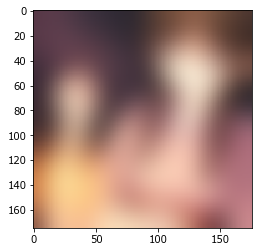

In [114]:
#与PIL实现的效果对比
import PIL.Image
import PIL.ImageFilter
im = PIL.Image.open(path)
im = im.filter(PIL.ImageFilter.GaussianBlur(radius=r*0.5))

#输出模糊后图片
fig, ax = plt.subplots()
imgplot=plt.imshow(im)
plt.show()